#### If we downloaded a different dataset, 
here is what the "Price" column is usually called:


|Dataset Source | Target Column Name|
|----------|---------|
|Kaggle Ames Housing| SalePrice|
|Scikit-Learn California | MedHouseVal (Median House Value)|
|Boston Housing (Old) | MEDV|
|Zillow Datasets| LogPrice or TaxValue|

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
import pandas as pd
import urllib.request

# The URL to the raw CSV
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

# Download and save it locally as 'housing_data.csv'
urllib.request.urlretrieve(url, "housing_data.csv")

# Load it into Pandas
dfx = pd.read_csv("housing_data.csv")
print(dfx.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [14]:
# 2. load and Prepare Data

df = pd.read_csv("housing.csv")
# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Keep only numeric columns
df = df.select_dtypes(include=["int64", "float64"])
# Fill missing values
df.fillna(df.median(), inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
# 3. Select Features and Targets
X = df.drop(columns=["median_house_value"]).values # features
y = df["median_house_value"].values.reshape(-1,1)  # targets

In [16]:
# Feature Scaling 
# Gradient descent fails or converges slowly without scaling
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X-X_mean)/X_std

### 5. Add Bias Term (Intercept)

Linear regression equation:
$$ y=Xw+b $$

We handle $b$ by adding a column of ones.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

m = X.shape[0]
X = np.c_[np.ones((m,1)),X]

### 6. Initialize Parameters

In [19]:
np.random.seed(42)
weights = np.random.randn(X.shape[1],1)

### 7. Define Cost Function (MSE)

In [22]:
def compute_cost(X,y,weights):
    predictions = X@weights
    errors = predictions - y
    cost = (1/(2*len(y)))*np.sum(errors**2)
    return cost

#### ML intuition:
* Measures how wrong predictions are
* Lower cost = better model

### 8. Gradient Descent Implementation

In [23]:
def gradient_descent(X,y,weights,lr=0.01,epochs=1000):
    cost_history = []
    
    for _ in range(epochs):
        predictions = X@ weights
        gradients = (2/len(y))*X.T@(predictions-y)
        weights -=lr*gradients
        cost_history.append(compute_cost(X,y,weights))
    return weights, cost_history

### 9. Train the Model

In [24]:
weights, cost_history = gradient_descent(
    X,y, weights, lr = 0.01, epochs = 2000
)

### 10. Plot Cost Reduction (Learning Curve)

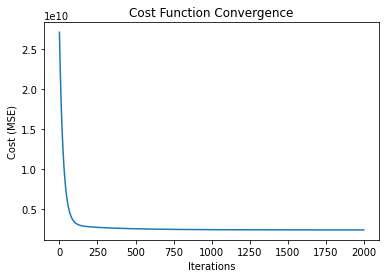

In [28]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

### 11. Make predictions

In [30]:
y_pred = X @ weights


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 10)

In [31]:
X.shape

(20640, 10)

In [32]:
weights.shape

(9, 1)

### Example 3: Medical Insurance Regression from Scratch (Matrix Method)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# 2. Preprocessing (Same as before)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# 3. Prepare the Matrices
# We need to add a column of 1s to X to represent the 'Intercept' (the 'b' in mx+b)
n_samples = df.shape[0]
X = np.column_stack([np.ones(n_samples), df['age'].values, df['bmi'].values, df['smoker'].values])
y = df['charges'].values.reshape(-1, 1)

# 4. The Normal Equation: theta = inv(X.T @ X) @ X.T @ y
# .T is Transpose, @ is Matrix Multiplication, np.linalg.inv is Inverse
XT = X.T
theta = np.linalg.inv(XT @ X) @ XT @ y

# 5. Extract our learned parameters
intercept = theta[0][0]
coeff_age = theta[1][0]
coeff_bmi = theta[2][0]
coeff_smoker = theta[3][0]

print(f"--- Learned Parameters ---")
print(f"Intercept: {intercept:.2f}")
print(f"Age Weight: {coeff_age:.2f}")
print(f"BMI Weight: {coeff_bmi:.2f}")
print(f"Smoker Weight: {coeff_smoker:.2f}")

# 6. Make a Prediction for a new person
# Age: 30, BMI: 25.0, Smoker: No (0)
# Remember to include the 1 at the start for the intercept!
new_data = np.array([1, 30, 25.0, 0])
prediction = new_data @ theta

print(f"\nPredicted Cost for a 30yo non-smoker: ${prediction[0]:,.2f}")

--- Learned Parameters ---
Intercept: -11676.83
Age Weight: 259.55
BMI Weight: 322.62
Smoker Weight: 23823.68

Predicted Cost for a 30yo non-smoker: $4,174.97


### Example 4: Insurance Regression: Gradient Descent + $R^2$ from Scratch

---Gradient Descent Results----
Final Cost: 18502697.88
R-squared Score: 0.7475

 Learned Weights (Normalized):
Intercept:13270.42
age:3645.27
bmi:1966.63
smoker:9613.88


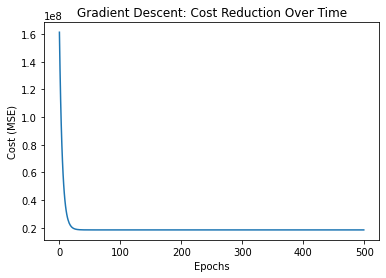

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Preprocess Data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

# Select Features
features = ['age','bmi','smoker']
X = df[features].values
y = df['charges'].values.reshape(-1,1)

# 2.Feature Scaling (Z-score Normalization)
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
X_scaled = (X-X_mean)/X_std

# Add Intercept Column (column of 1s) 
X_scaled = np.c_[np.ones(X_scaled.shape[0]),X_scaled]

# 3. Gradient Descent Setup
learning_rate = 0.1
epochs = 500
n_samples, n_features = X_scaled.shape
weights = np.zeros((n_features,1))
cost_history = []

# 4. The Gradient Descent Loop
for i in range(epochs):
    y_pred = X_scaled @ weights
    error = y_pred -y
    cost = (1/(2*n_samples))*np.sum(error**2)
    cost_history.append(cost)
    
    # Calculate Gradients
    gradient = (1/n_samples)*(X_scaled.T @ error)
    
    # Update Weights
    weights = weights - learning_rate*gradient
# 5. Calculate R-Squared (Accuracy) from Scratch
# R2 = 1 - (Sum of Squares Residuals / Sum of Squared Total)
y_mean = np.mean(y)
ss_res = np.sum((y-y_pred)**2)
ss_tot = np.sum((y-y_mean)**2)
r2_score = 1 -(ss_res / ss_tot)

# 6. Output Results
print(f"---Gradient Descent Results----")
print(f"Final Cost: {cost_history[-1]:.2f}")
print(f"R-squared Score: {r2_score:.4f}")
print(f"\n Learned Weights (Normalized):")
for name, w in zip(['Intercept']+features,weights.flatten()):
    print(f"{name}:{w:.2f}")
    
# 7. Visualize Convergence (Learning Curve)
plt.plot(range(epochs),cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent: Cost Reduction Over Time")
plt.show()

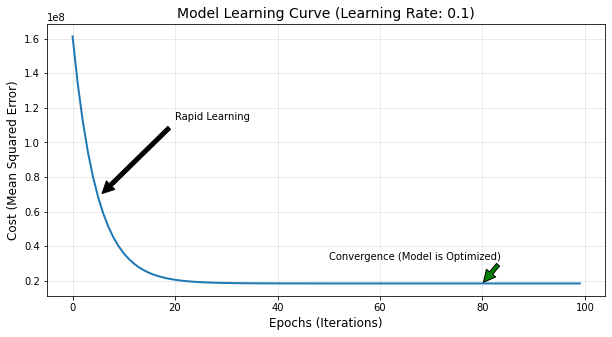

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# --- (Assuming X_scaled, y, and weights are defined from the previous step) ---

def plot_learning_process(X, y, learning_rate=0.1, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    cost_history = []

    for i in range(epochs):
        # 1. Prediction
        y_pred = X @ weights
        
        # 2. Calculate Error and Cost
        error = y_pred - y
        cost = (1/(2 * n_samples)) * np.sum(error**2)
        cost_history.append(cost)
        
        # 3. Update Weights (The "Learning" Step)
        gradient = (1/n_samples) * (X.T @ error)
        weights = weights - learning_rate * gradient

    # Plotting the Result
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), cost_history, color='tab:blue', linewidth=2)
    plt.title(f"Model Learning Curve (Learning Rate: {learning_rate})", fontsize=14)
    plt.xlabel("Epochs (Iterations)", fontsize=12)
    plt.ylabel("Cost (Mean Squared Error)", fontsize=12)
    plt.grid(alpha=0.3)
    
    # Annotate the "Learning"
    plt.annotate('Rapid Learning', xy=(epochs*0.05, cost_history[int(epochs*0.05)]), 
                 xytext=(epochs*0.2, cost_history[0]*0.7),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.annotate('Convergence (Model is Optimized)', xy=(epochs*0.8, cost_history[-1]), 
                 xytext=(epochs*0.5, cost_history[0]*0.2),
                 arrowprops=dict(facecolor='green', shrink=0.05))
    
    plt.show()

# Run the function
plot_learning_process(X_scaled, y)